In [8]:
!pip install simpy numpy matplotlib



In [15]:
import simpy
import numpy as np
import random
import matplotlib.pyplot as plt


# Load balancing algorithms


In [9]:
def round_robin(servers, request_id):
    server = servers[request_id % len(servers)]  # Cyclic selection
    return server

def least_loaded(servers, request_id):
    # Choose the server with the least load
    server = min(servers, key=lambda x: x['load'])
    return server

def random_selection(servers, request_id):
    # Random server selection
    return random.choice(servers)

# Request arrival process

In [10]:

def request_arrival(env, servers, algorithm, request_times, processing_times):
    request_id = 0
    while True:
        inter_arrival_time = np.random.exponential(1)  # Poisson distribution
        yield env.timeout(inter_arrival_time)

        # Select server based on the chosen algorithm
        server = algorithm(servers, request_id)

        # Simulate the request processing
        processing_time = np.random.normal(5, 1)  # Normal distribution for processing time
        request_times.append(env.now)  # Log the request arrival time
        processing_times.append(processing_time)  # Log the processing time
        server['load'] += 1  # Increment server load

        # Process the request
        env.process(process_request(env, server, processing_time, request_id))
        request_id += 1


# Request processing (server simulation)

In [11]:

def process_request(env, server, processing_time, request_id):
    yield env.timeout(processing_time)
    server['load'] -= 1  # Decrease load after processing
    server['processing_times'].append(processing_time)


In [12]:

def request_arrival(env, servers, algorithm, request_times, processing_times):
    request_id = 0
    while True:
        inter_arrival_time = np.random.exponential(1)  # Poisson distribution
        yield env.timeout(inter_arrival_time)

        # Select server based on the chosen algorithm
        server = algorithm(servers, request_id)

        # Simulate the request processing
        processing_time = np.random.normal(5, 1)  # Normal distribution for processing time
        request_times.append(env.now)  # Log the request arrival time
        processing_times.append(processing_time)  # Log the processing time
        server['load'] += 1  # Increment server load

        # Process the request
        env.process(process_request(env, server, processing_time, request_id))
        request_id += 1

In [13]:
# Request processing (server simulation)
def process_request(env, server, processing_time, request_id):
    yield env.timeout(processing_time)
    server['load'] -= 1  # Decrease load after processing
    server['processing_times'].append(processing_time)

# Run the simulation

Running simulation with round_robin, Arrival Rate: 0.5, Servers: 2
Total Requests: 1019
Server Utilizations: [2.566983480050595, 2.567600664716591]
Average Response Times: [np.float64(5.0730898815229155), np.float64(5.0743096140644095)]
--------------------------------------------------


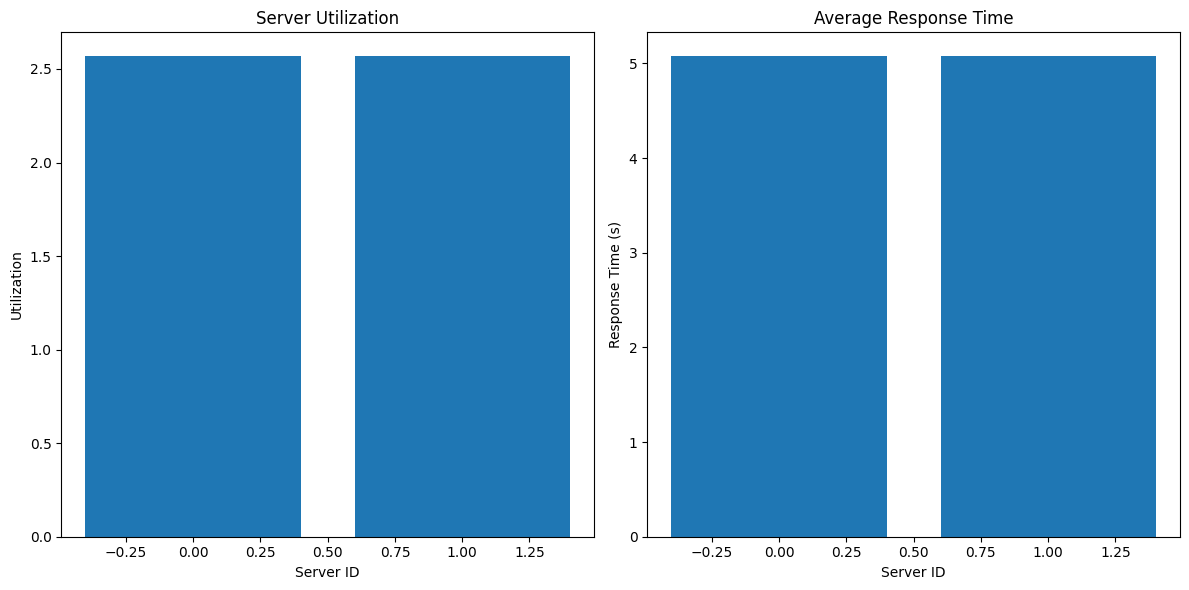

Running simulation with round_robin, Arrival Rate: 0.5, Servers: 4
Total Requests: 1063
Server Utilizations: [1.3045202152095159, 1.319879302820048, 1.3085016067096924, 1.3482344349044413]
Average Response Times: [np.float64(4.979084790876016), np.float64(5.018552482205504), np.float64(4.975291280264989), np.float64(5.14593295765054)]
--------------------------------------------------


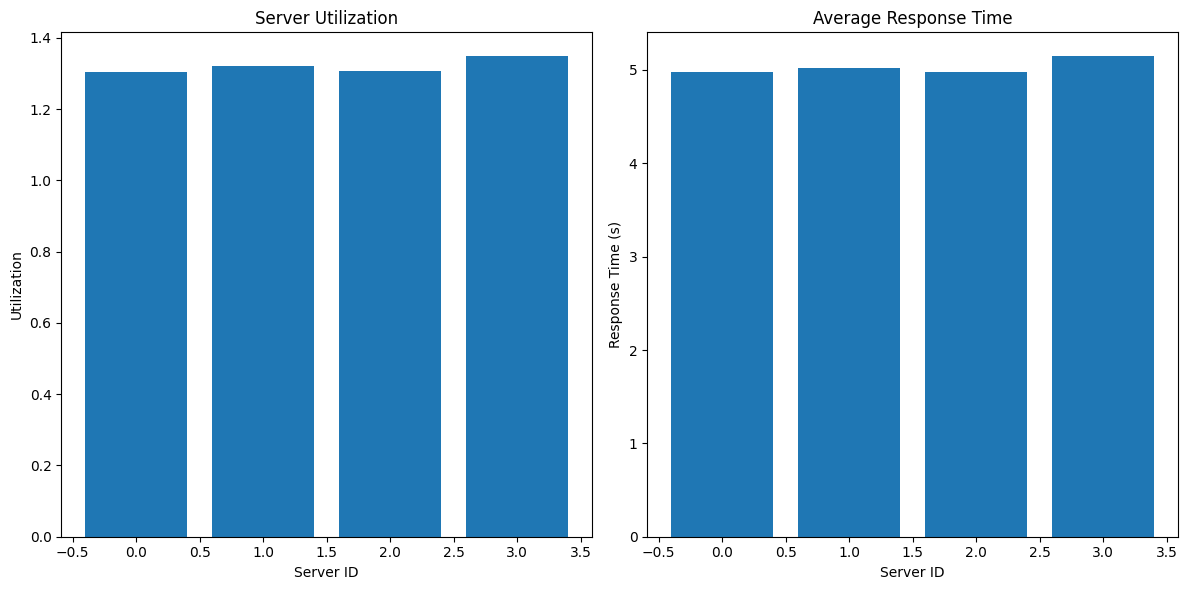

Running simulation with round_robin, Arrival Rate: 0.5, Servers: 6
Total Requests: 988
Server Utilizations: [0.8113967592794143, 0.8296372778962922, 0.8229860159521227, 0.7958959269478371, 0.8305241110574727, 0.8148582959620857]
Average Response Times: [np.float64(4.947541215118382), np.float64(5.028104714522982), np.float64(5.0182074143422115), np.float64(4.853023944803884), np.float64(5.064171408887025), np.float64(4.968648146110277)]
--------------------------------------------------


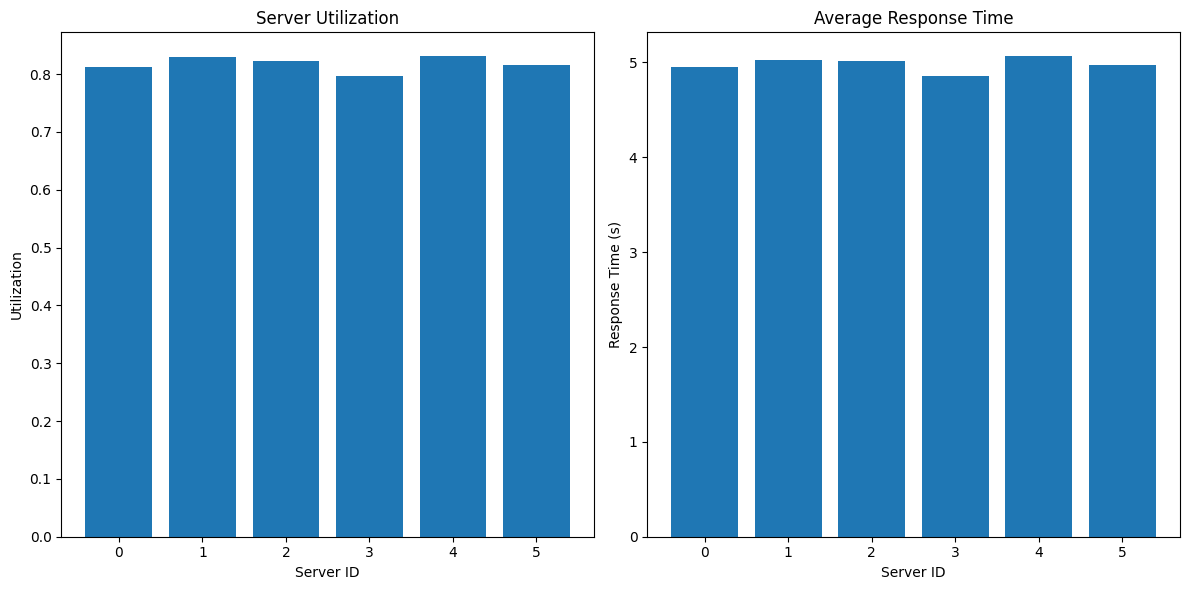

Running simulation with round_robin, Arrival Rate: 1, Servers: 2
Total Requests: 1016
Server Utilizations: [2.519062886360279, 2.4798749201019183]
Average Response Times: [np.float64(4.9685658508092265), np.float64(4.8912720317592076)]
--------------------------------------------------


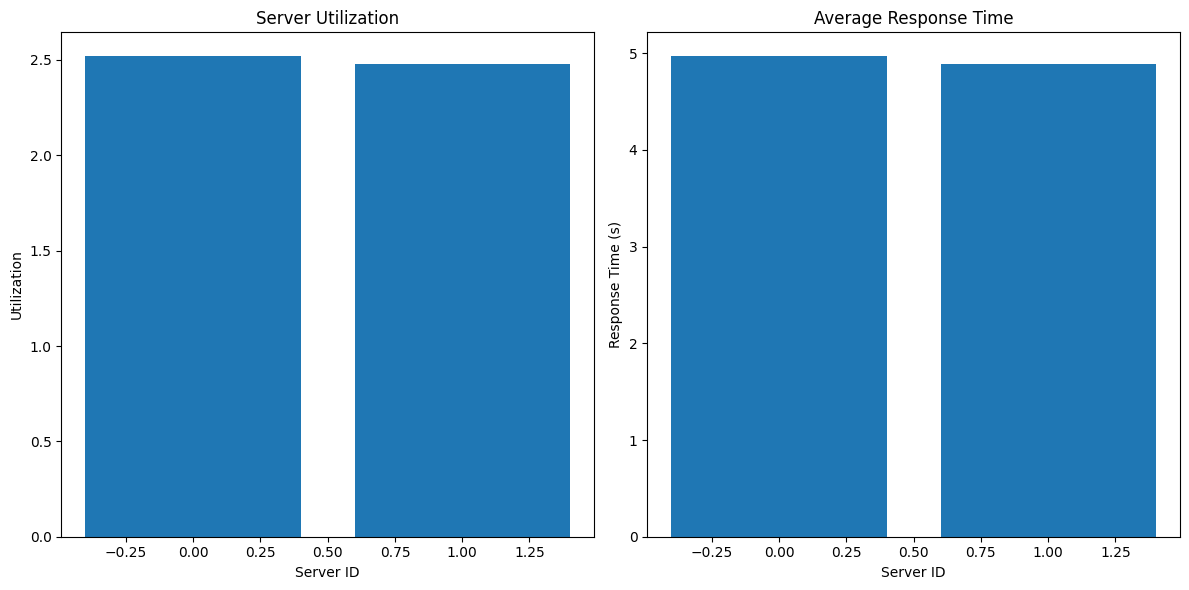

Running simulation with round_robin, Arrival Rate: 1, Servers: 4
Total Requests: 1013
Server Utilizations: [1.2963199998156671, 1.253955299913934, 1.2720521452678328, 1.2567381732832952]
Average Response Times: [np.float64(5.1237944656745755), np.float64(4.956345058948353), np.float64(5.027874091967718), np.float64(4.98705624318768)]
--------------------------------------------------


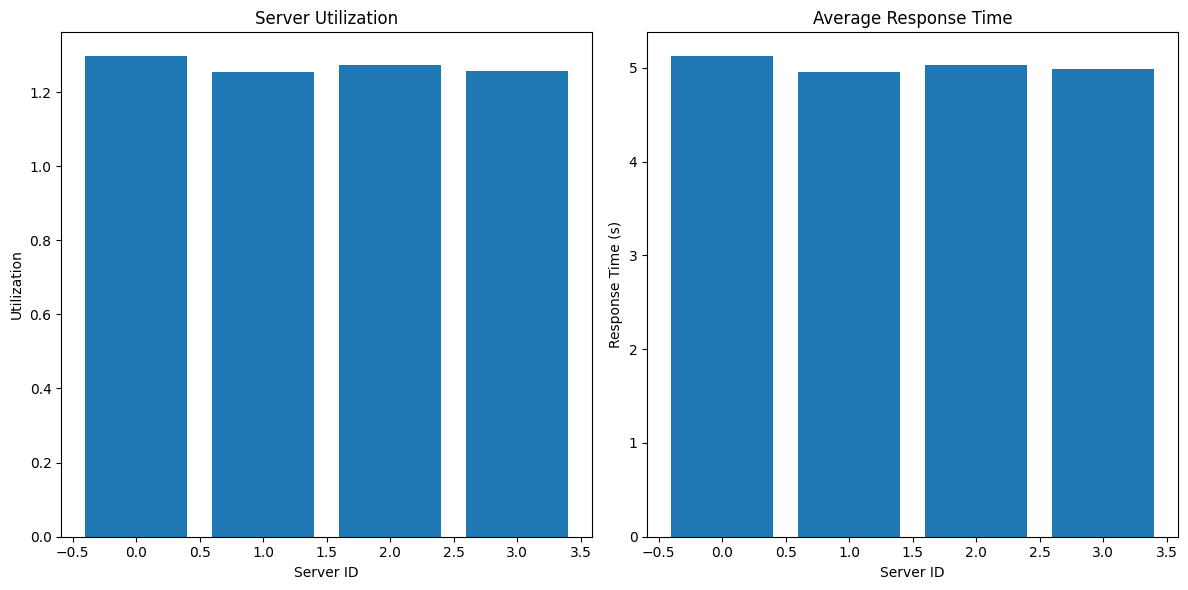

Running simulation with round_robin, Arrival Rate: 1, Servers: 6
Total Requests: 1014
Server Utilizations: [0.8503399974764115, 0.8553157087012958, 0.8479937325260253, 0.8328541964208849, 0.8247394037178487, 0.8128121775155944]
Average Response Times: [np.float64(5.03159761820362), np.float64(5.091164932745808), np.float64(5.047581741226341), np.float64(4.957465454886217), np.float64(4.909163117368149), np.float64(4.867138787518529)]
--------------------------------------------------


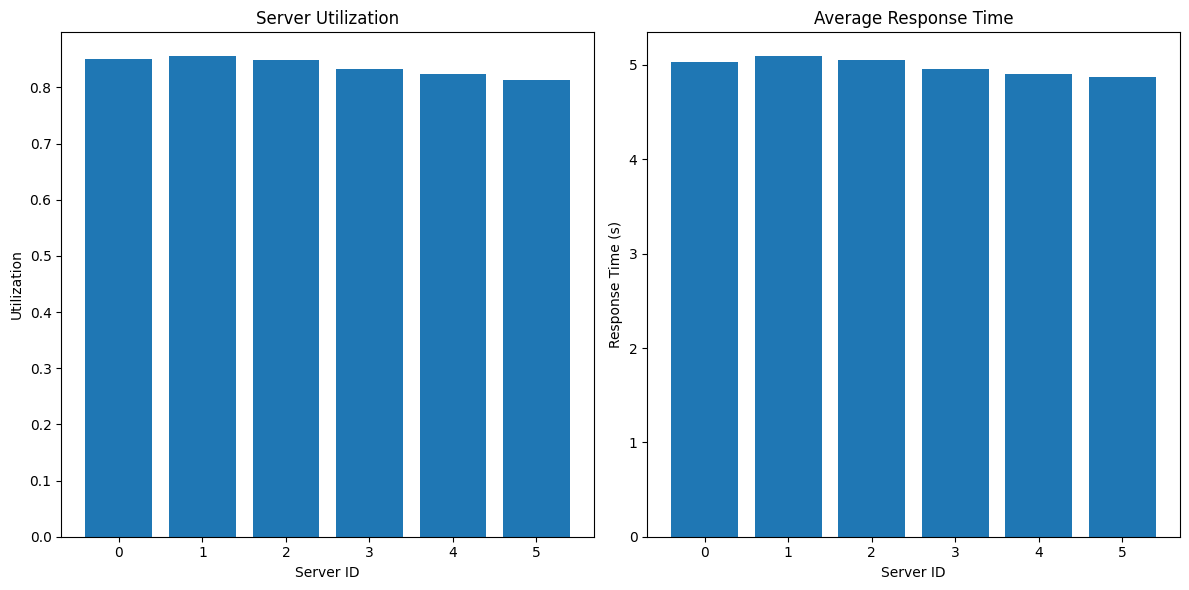

Running simulation with round_robin, Arrival Rate: 2, Servers: 2
Total Requests: 990
Server Utilizations: [2.4464159819990665, 2.4799670260313786]
Average Response Times: [np.float64(4.9522590728726055), np.float64(5.0201761660554185)]
--------------------------------------------------


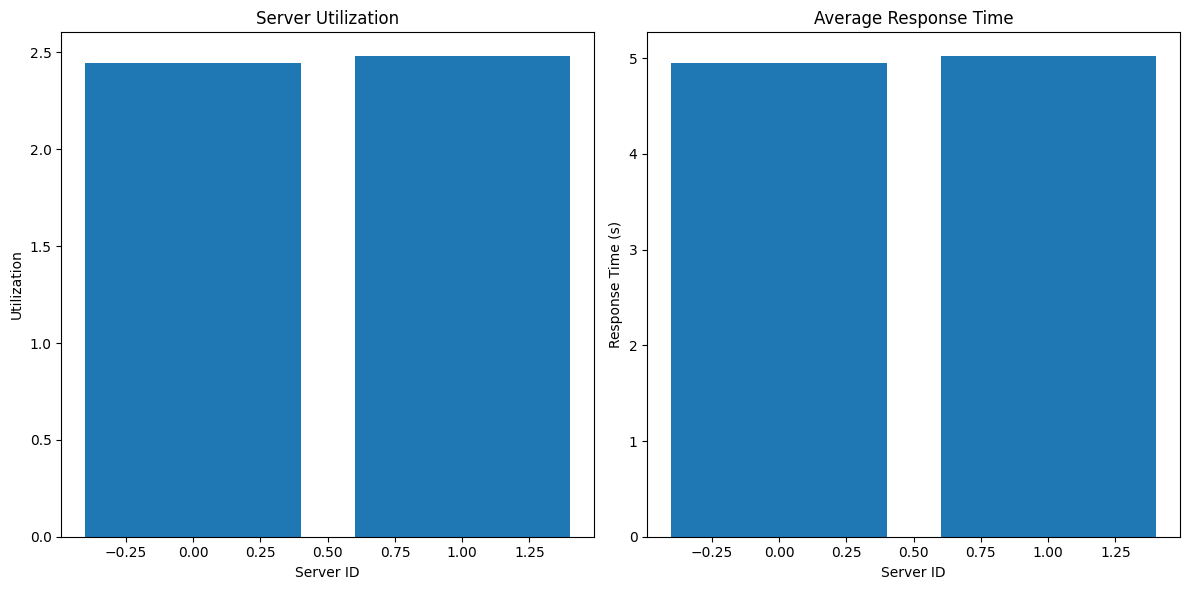

Running simulation with round_robin, Arrival Rate: 2, Servers: 4
Total Requests: 1018
Server Utilizations: [1.244540973368209, 1.263511442097134, 1.2419755972450854, 1.2570661863122479]
Average Response Times: [np.float64(4.919134282087786), np.float64(4.994116371925431), np.float64(4.908994455514175), np.float64(4.968641052617584)]
--------------------------------------------------


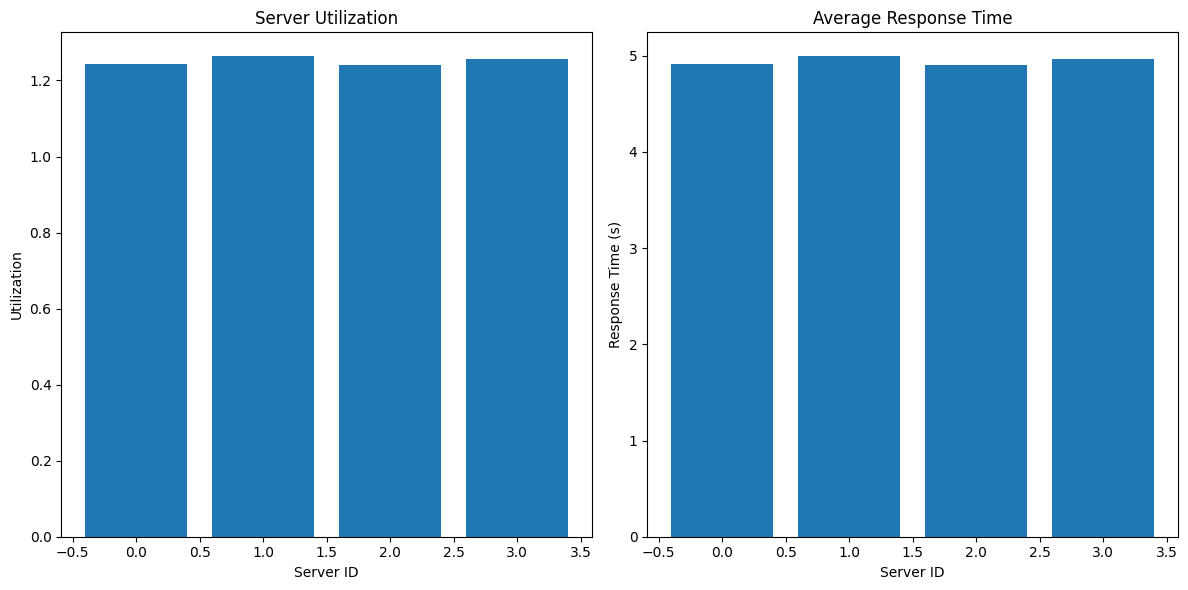

Running simulation with round_robin, Arrival Rate: 2, Servers: 6
Total Requests: 976
Server Utilizations: [0.808010604598148, 0.8336117479741125, 0.8009805283772378, 0.8245934633028371, 0.8102746071987721, 0.8015507718058268]
Average Response Times: [np.float64(4.957120273608268), np.float64(5.114182502908662), np.float64(4.913990971639495), np.float64(5.090083106807638), np.float64(5.001695106165262), np.float64(4.947844270406334)]
--------------------------------------------------


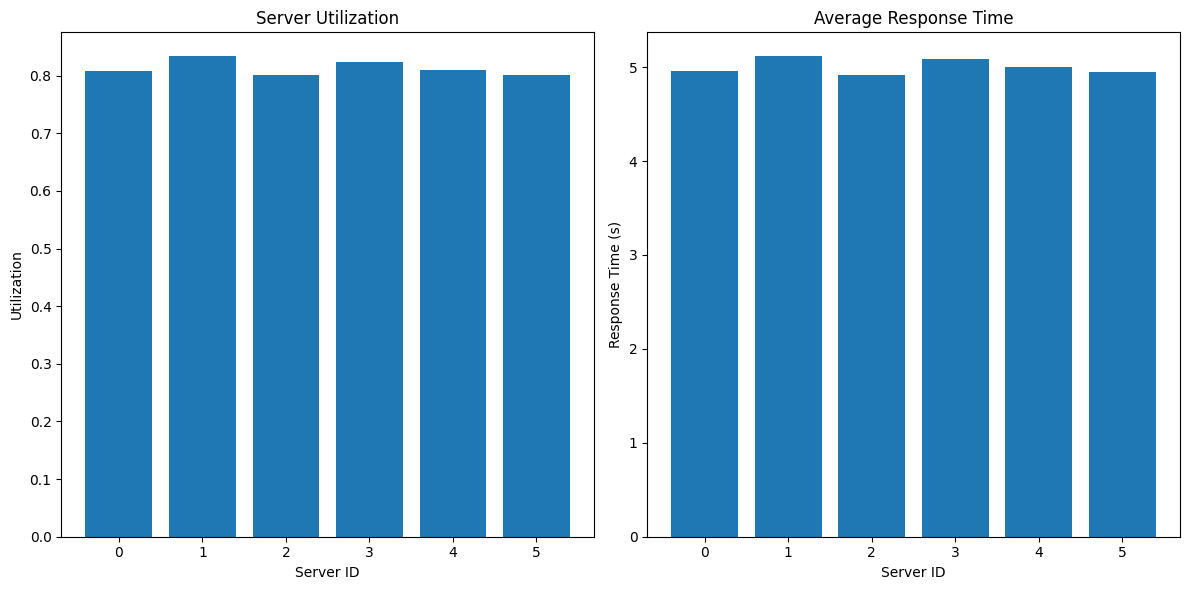

Running simulation with least_loaded, Arrival Rate: 0.5, Servers: 2
Total Requests: 1030
Server Utilizations: [2.7217545973960484, 2.3629195937281073]
Average Response Times: [np.float64(4.975785370011059), np.float64(4.953709840100849)]
--------------------------------------------------


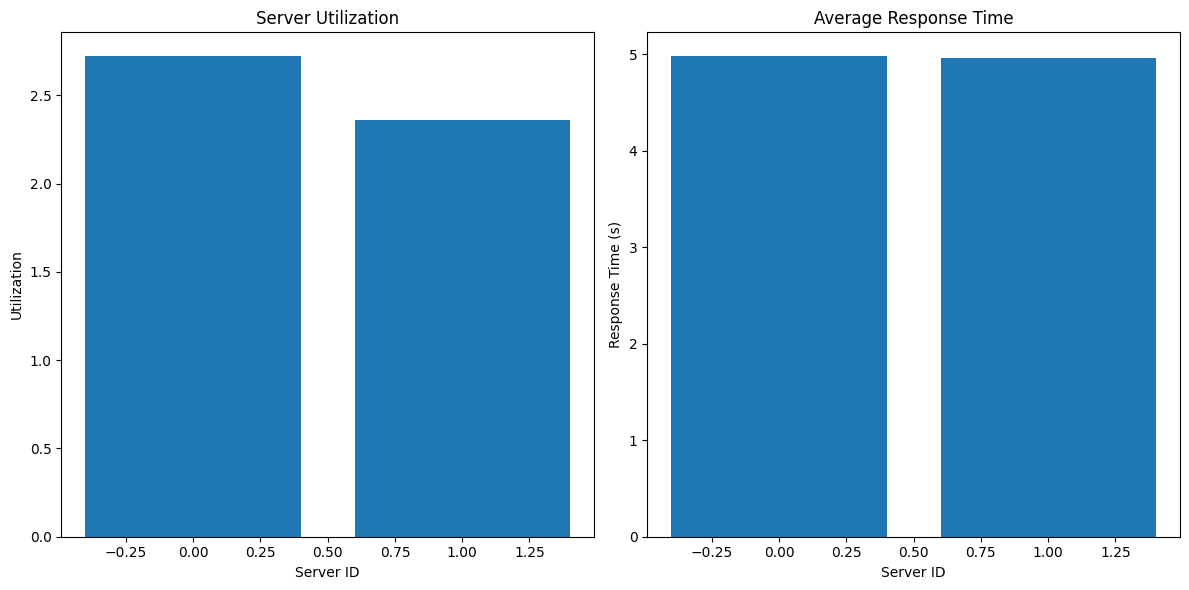

Running simulation with least_loaded, Arrival Rate: 0.5, Servers: 4
Total Requests: 991
Server Utilizations: [1.4998383712163883, 1.3480152176483478, 1.1321859596971016, 0.9557107952345143]
Average Response Times: [np.float64(4.901432585674468), np.float64(5.086849877918291), np.float64(5.054401605790631), np.float64(4.901081001202637)]
--------------------------------------------------


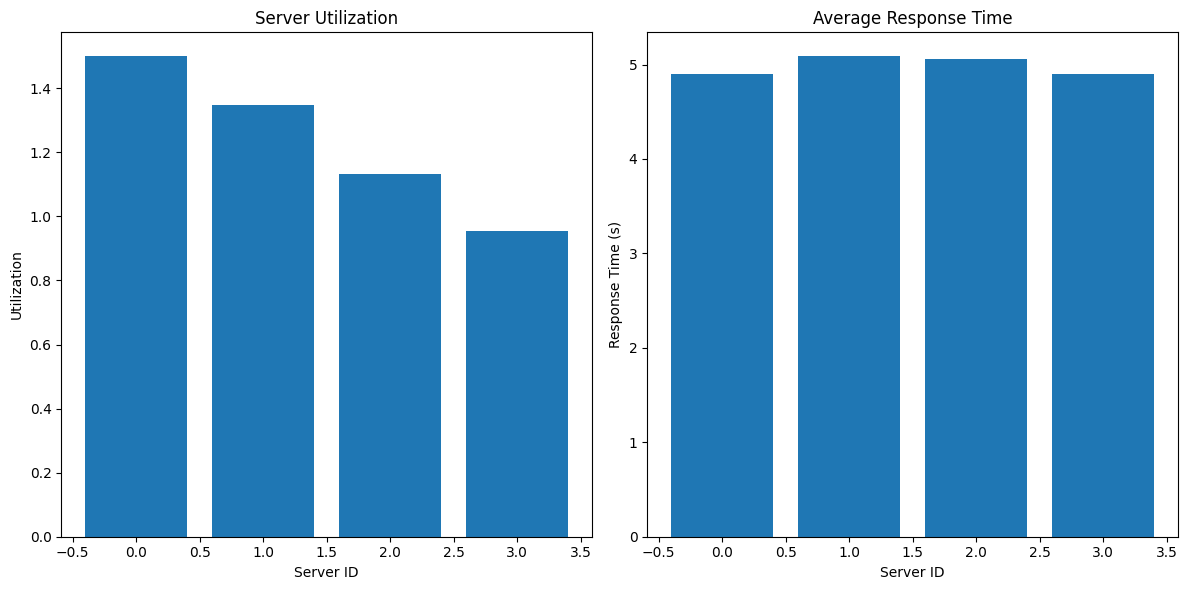

Running simulation with least_loaded, Arrival Rate: 0.5, Servers: 6
Total Requests: 999
Server Utilizations: [1.1641686168248448, 0.9757103775159358, 0.8932774803691668, 0.7699468933378715, 0.6523823489892187, 0.5043044153015751]
Average Response Times: [np.float64(4.975079559080535), np.float64(5.003642961620182), np.float64(5.075440229370265), np.float64(5.0323326361952425), np.float64(5.018325761455525), np.float64(4.896159371859953)]
--------------------------------------------------


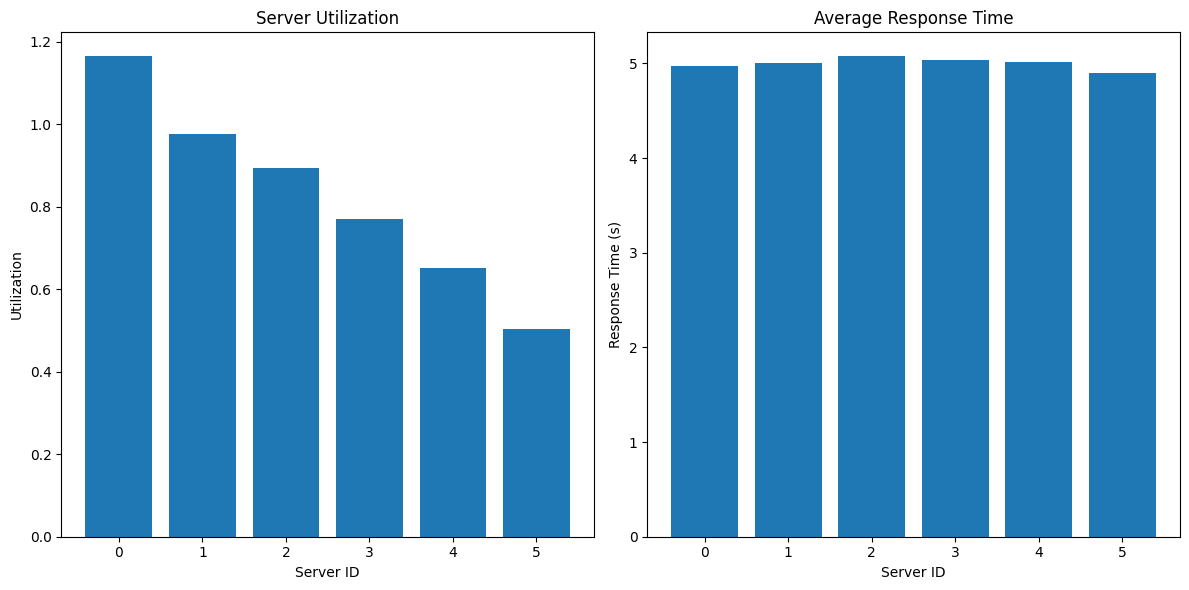

Running simulation with least_loaded, Arrival Rate: 1, Servers: 2
Total Requests: 995
Server Utilizations: [2.655951089840888, 2.2843161097330236]
Average Response Times: [np.float64(4.983022682628307), np.float64(4.976723550616609)]
--------------------------------------------------


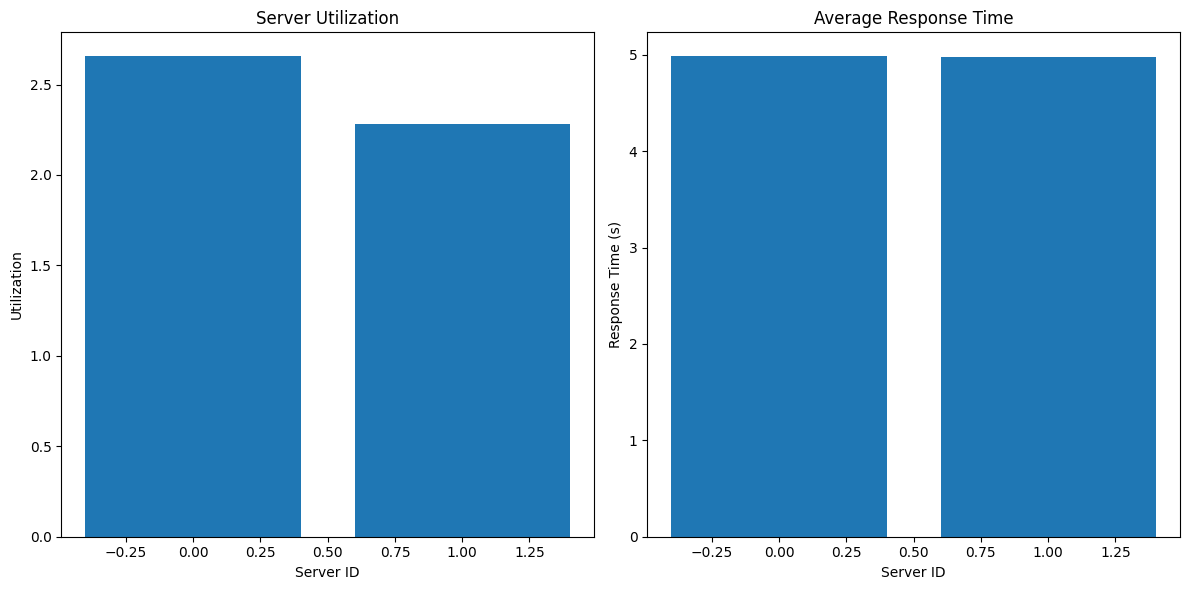

Running simulation with least_loaded, Arrival Rate: 1, Servers: 4
Total Requests: 973
Server Utilizations: [1.517136111117392, 1.327556588451352, 1.0860377636807568, 0.9117125786674125]
Average Response Times: [np.float64(5.057120370391303), np.float64(4.972122054124915), np.float64(4.959076546487473), np.float64(4.928176100904934)]
--------------------------------------------------


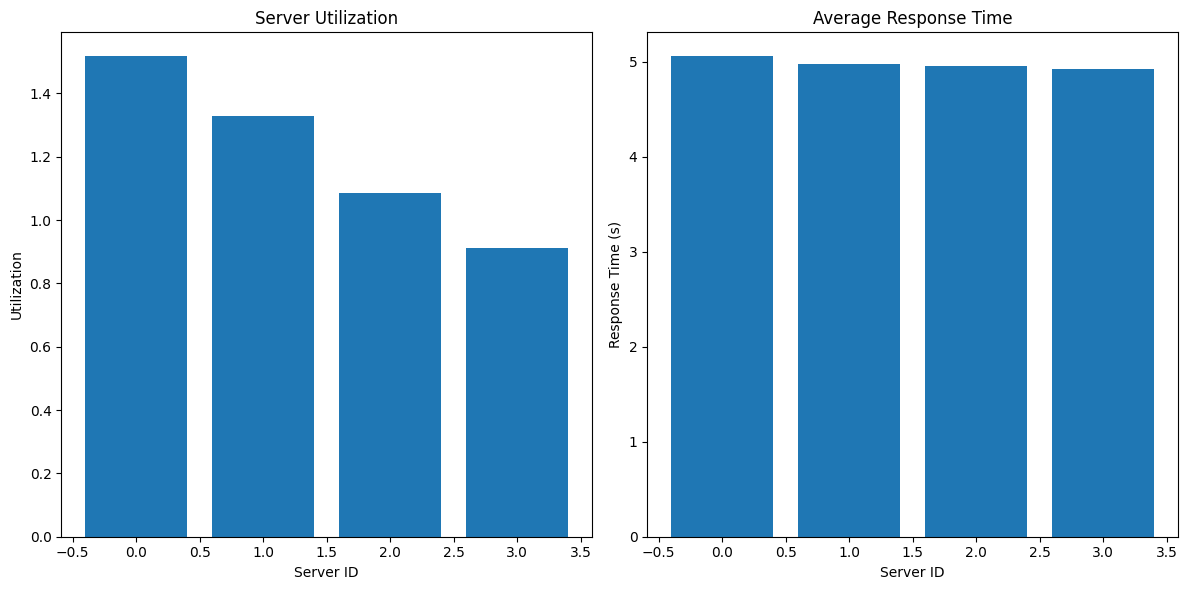

Running simulation with least_loaded, Arrival Rate: 1, Servers: 6
Total Requests: 956
Server Utilizations: [1.1059855835201138, 0.9817756823543211, 0.8495919490306192, 0.7227749360212026, 0.6244959392091393, 0.4648886695121609]
Average Response Times: [np.float64(5.027207197818699), np.float64(4.933546142484024), np.float64(4.8548111373178235), np.float64(5.019270389036129), np.float64(5.118819173845402), np.float64(4.945624143746392)]
--------------------------------------------------


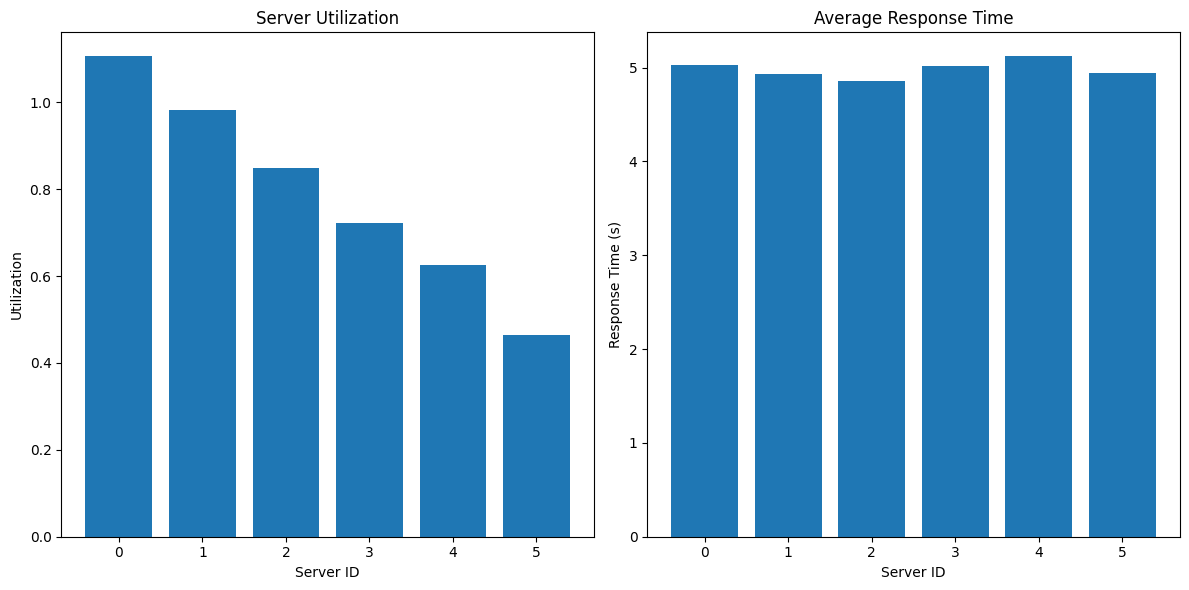

Running simulation with least_loaded, Arrival Rate: 2, Servers: 2
Total Requests: 1051
Server Utilizations: [2.806567136027147, 2.444136755137631]
Average Response Times: [np.float64(5.020692551032468), np.float64(5.029087973534216)]
--------------------------------------------------


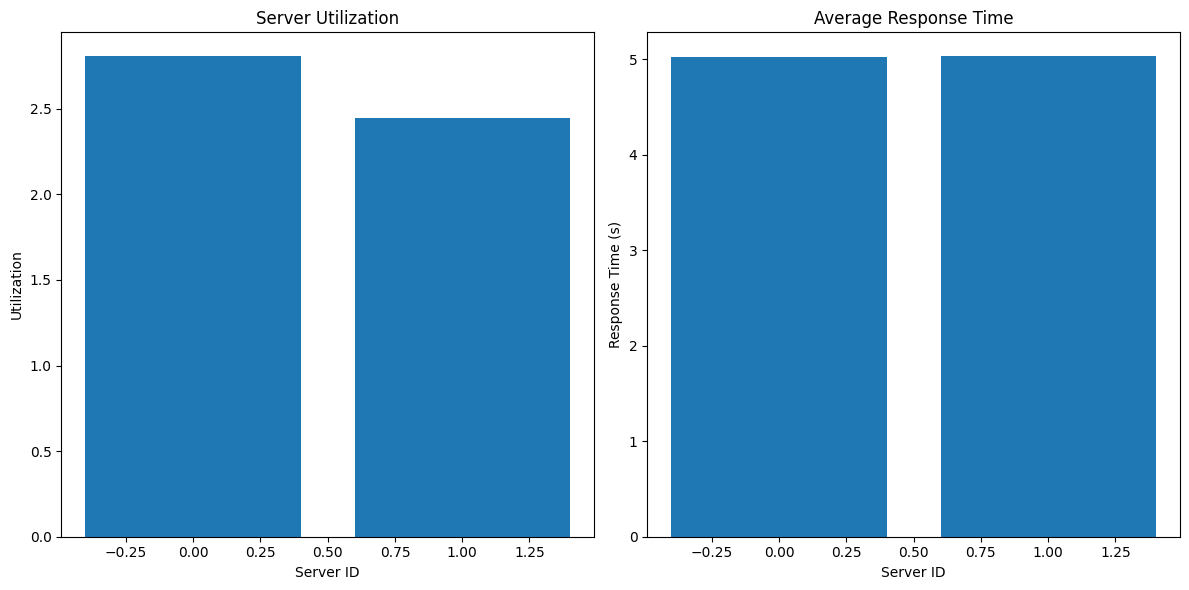

Running simulation with least_loaded, Arrival Rate: 2, Servers: 4
Total Requests: 947
Server Utilizations: [1.46985120741793, 1.2667331350236946, 1.0965128968309072, 0.9062325366612171]
Average Response Times: [np.float64(5.051035077037561), np.float64(5.006850336062038), np.float64(4.961596818239403), np.float64(5.119957834244166)]
--------------------------------------------------


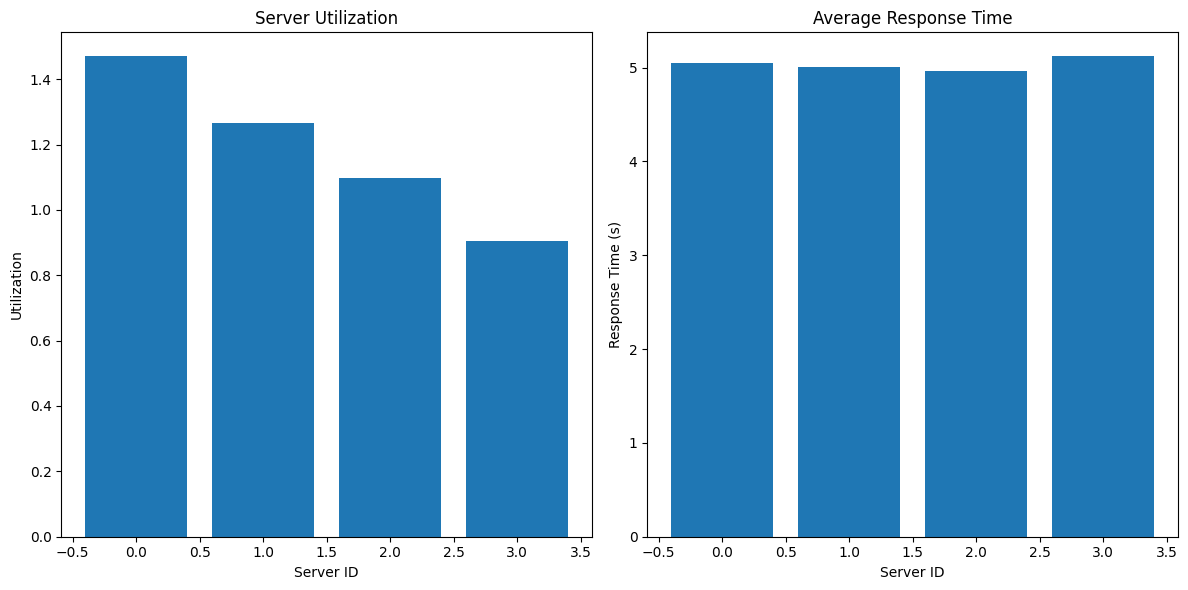

Running simulation with least_loaded, Arrival Rate: 2, Servers: 6
Total Requests: 1002
Server Utilizations: [1.168398686505036, 0.9978304699488435, 0.8866980111162686, 0.7372113583667717, 0.6453607908641071, 0.5286493222866196]
Average Response Times: [np.float64(5.0362012349355005), np.float64(5.065129289080424), np.float64(4.981449500653193), np.float64(4.914742389111812), np.float64(4.964313775877746), np.float64(5.034755450348756)]
--------------------------------------------------


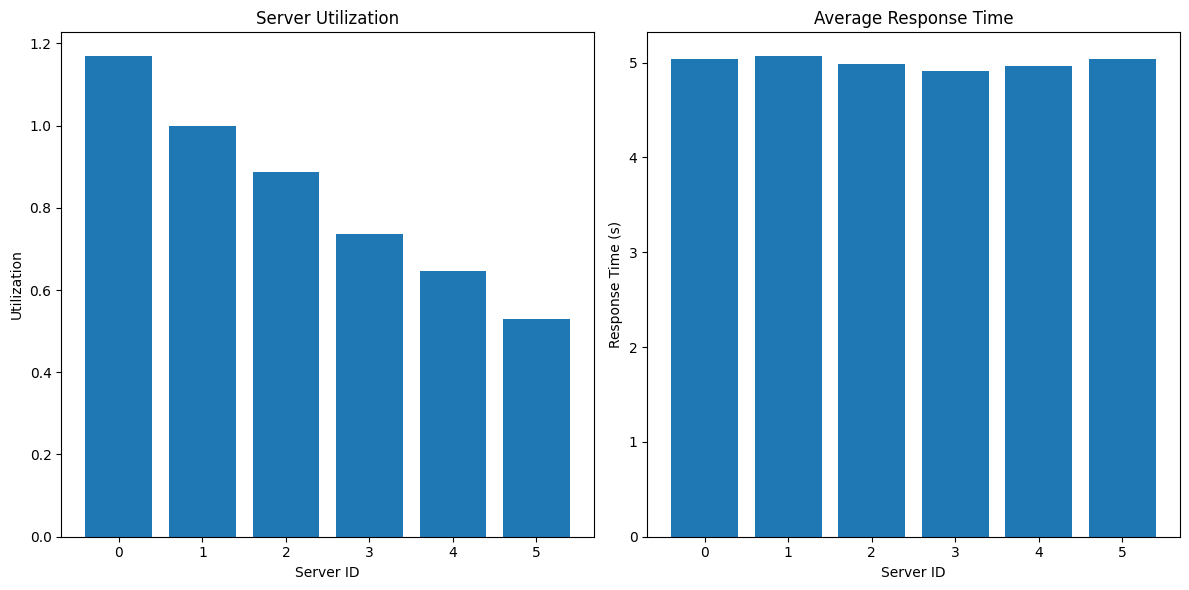

Running simulation with random_selection, Arrival Rate: 0.5, Servers: 2
Total Requests: 987
Server Utilizations: [2.4178827865203525, 2.4235872742222253]
Average Response Times: [np.float64(4.975067461976039), np.float64(4.925990394760623)]
--------------------------------------------------


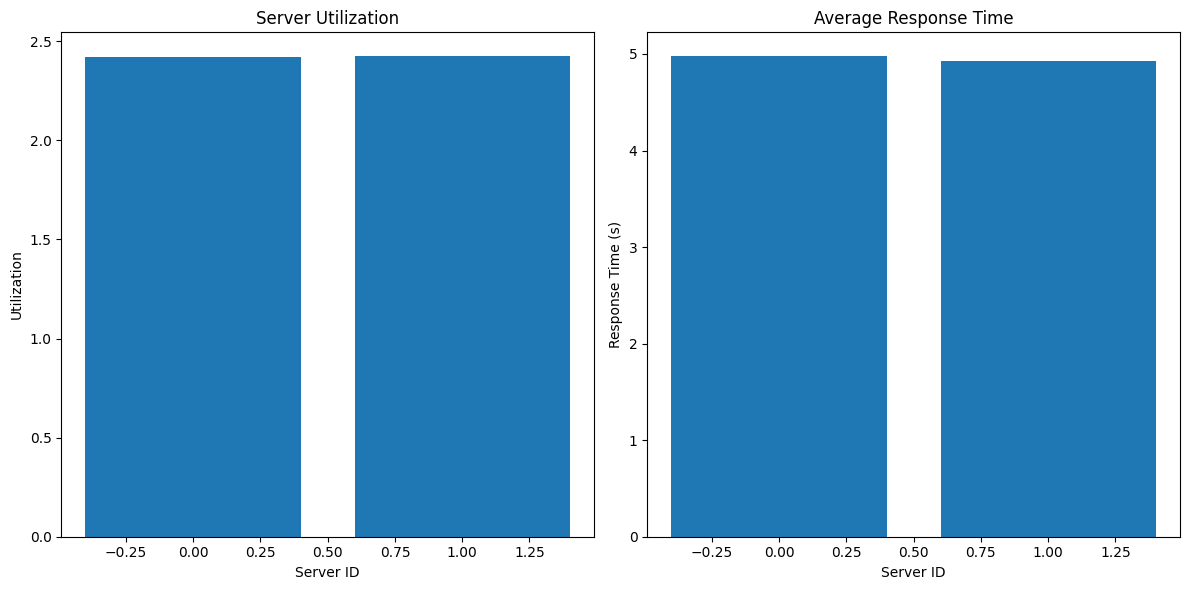

Running simulation with random_selection, Arrival Rate: 0.5, Servers: 4
Total Requests: 997
Server Utilizations: [1.3141367305117613, 1.260856022699189, 1.214900424089599, 1.2065108530057425]
Average Response Times: [np.float64(5.015789047754816), np.float64(5.104680253842872), np.float64(4.958777241182043), np.float64(5.006269099608891)]
--------------------------------------------------


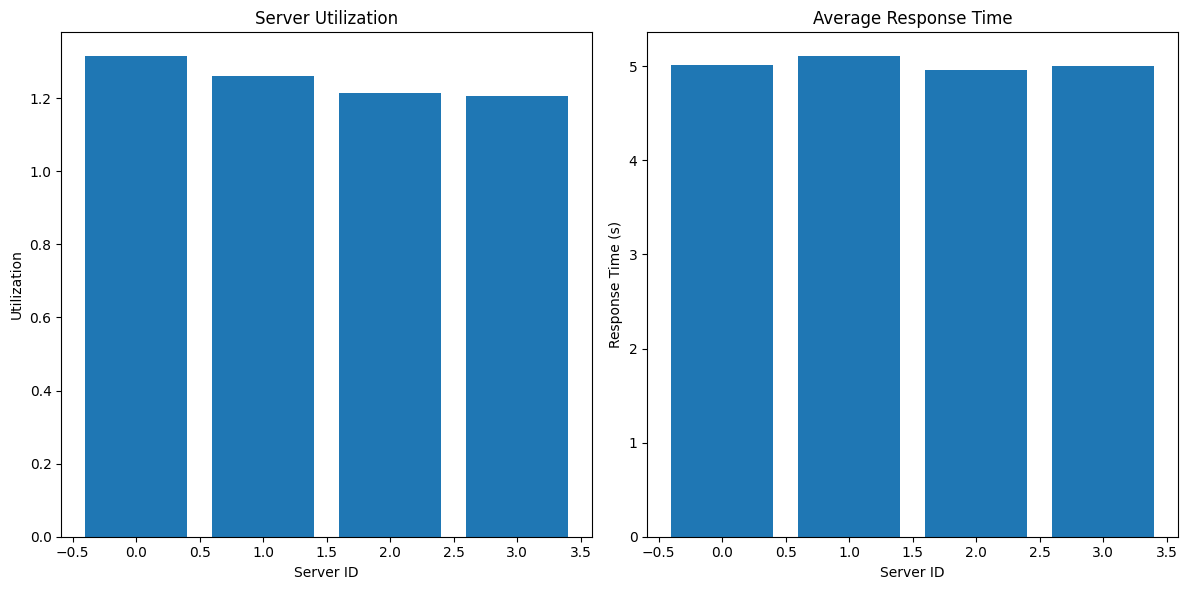

Running simulation with random_selection, Arrival Rate: 0.5, Servers: 6
Total Requests: 991
Server Utilizations: [0.8388353111197533, 0.9987538082476751, 0.8387095977649801, 0.7933271789382212, 0.6238635499219619, 0.8155983432347567]
Average Response Times: [np.float64(4.993067328093771), np.float64(5.018863358028516), np.float64(4.962778684999884), np.float64(5.053039356294403), np.float64(4.951298015253665), np.float64(5.03455767428862)]
--------------------------------------------------


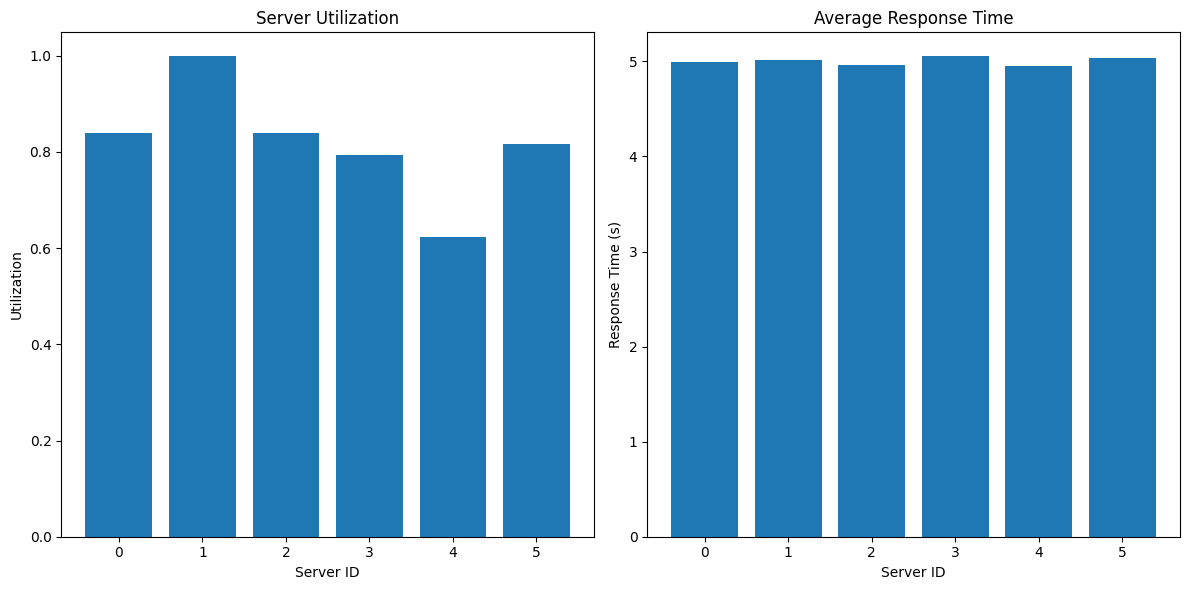

Running simulation with random_selection, Arrival Rate: 1, Servers: 2
Total Requests: 1019
Server Utilizations: [2.4631030763149546, 2.6002844004075216]
Average Response Times: [np.float64(4.9759658107372875), np.float64(5.01018188903184)]
--------------------------------------------------


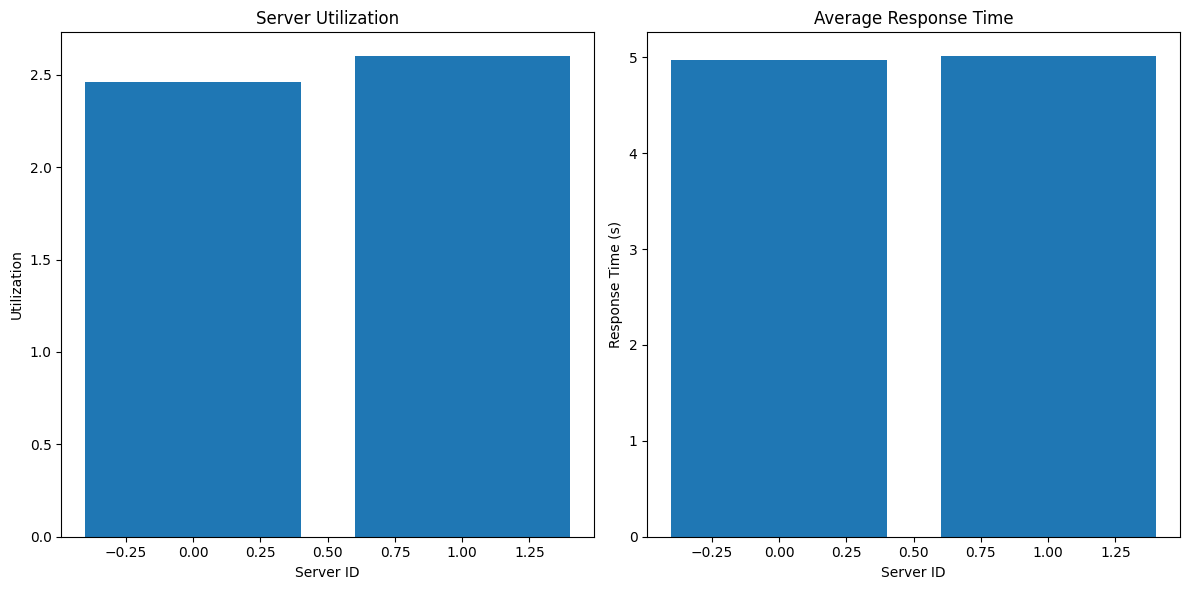

Running simulation with random_selection, Arrival Rate: 1, Servers: 4
Total Requests: 990
Server Utilizations: [1.3338869694045439, 1.2441047282592372, 1.1335824525832947, 1.2367496674563565]
Average Response Times: [np.float64(4.995831346084432), np.float64(5.036861248013106), np.float64(4.950141714337531), np.float64(5.0895048043471425)]
--------------------------------------------------


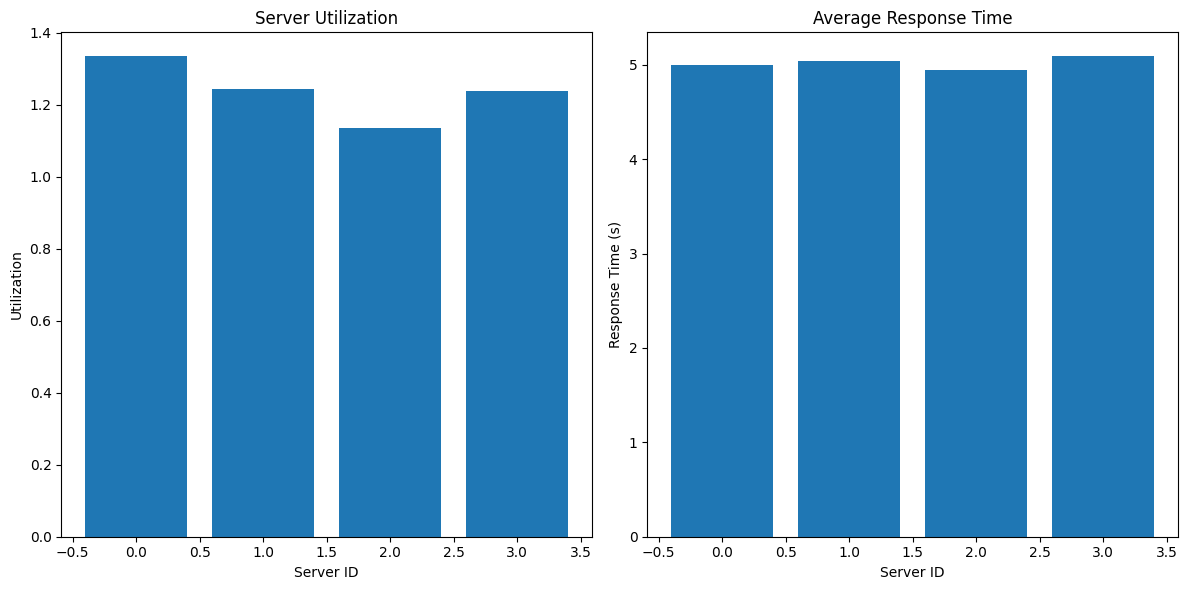

Running simulation with random_selection, Arrival Rate: 1, Servers: 6
Total Requests: 999
Server Utilizations: [0.9154907713646158, 0.7784058765495708, 0.8842618779635899, 0.9382043534778006, 0.6917640007220899, 0.7335393215755351]
Average Response Times: [np.float64(5.0860598409145314), np.float64(4.957999213691536), np.float64(4.940010491416701), np.float64(4.990448688711707), np.float64(4.906127664695674), np.float64(4.857876301824732)]
--------------------------------------------------


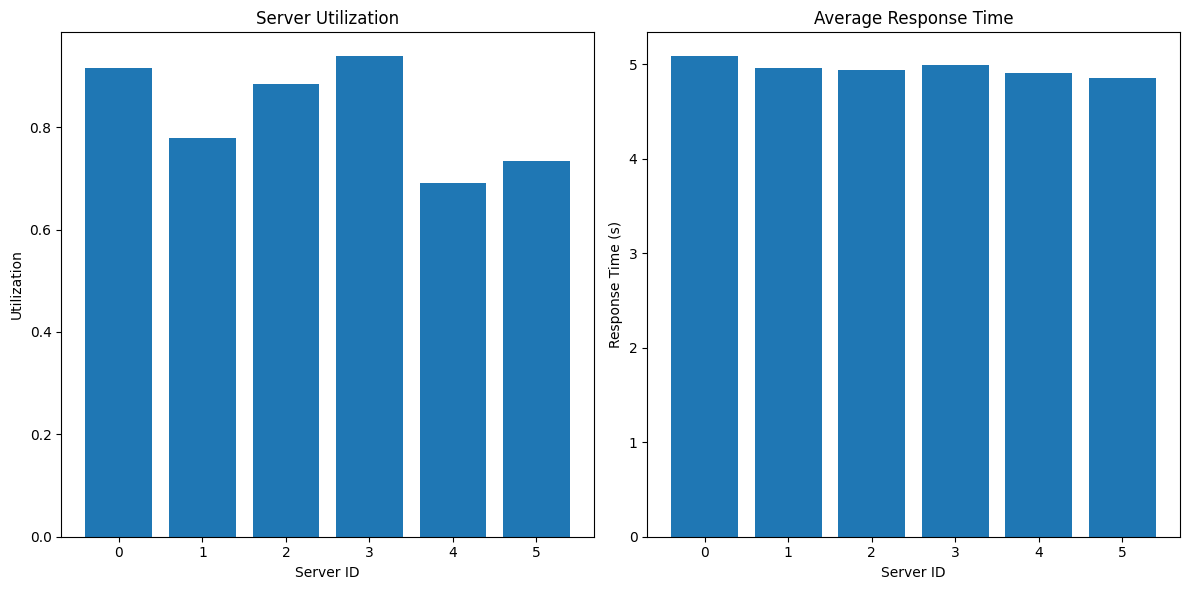

Running simulation with random_selection, Arrival Rate: 2, Servers: 2
Total Requests: 1022
Server Utilizations: [2.448126926626899, 2.616433995188461]
Average Response Times: [np.float64(4.9557225235362345), np.float64(4.983683800358976)]
--------------------------------------------------


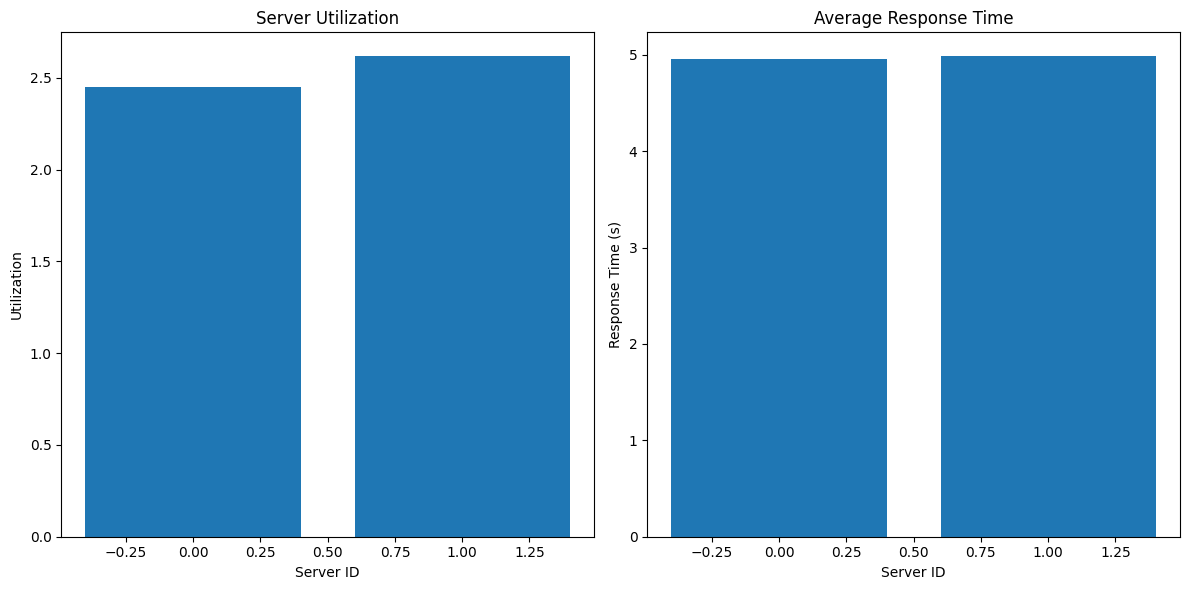

Running simulation with random_selection, Arrival Rate: 2, Servers: 4
Total Requests: 1001
Server Utilizations: [1.3836568745081375, 1.1450691743828594, 1.2217281877602708, 1.2386558634282865]
Average Response Times: [np.float64(5.031479543665951), np.float64(4.957009412912811), np.float64(5.111833421591092), np.float64(4.97452153987264)]
--------------------------------------------------


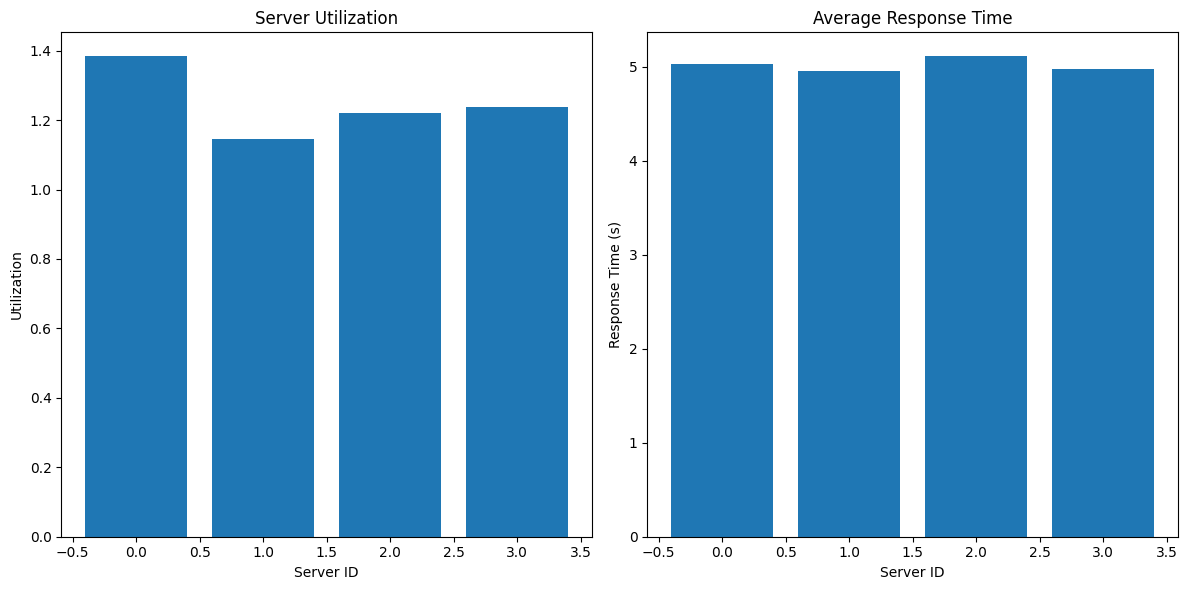

Running simulation with random_selection, Arrival Rate: 2, Servers: 6
Total Requests: 977
Server Utilizations: [0.824039580708897, 0.8201596247148917, 0.7932007460266178, 0.753542893814073, 0.7677925201941089, 0.9034130213850177]
Average Response Times: [np.float64(5.0246315896883935), np.float64(4.940720630812603), np.float64(5.052234051124956), np.float64(4.990350290159426), np.float64(4.953500130284572), np.float64(4.991232162348163)]
--------------------------------------------------


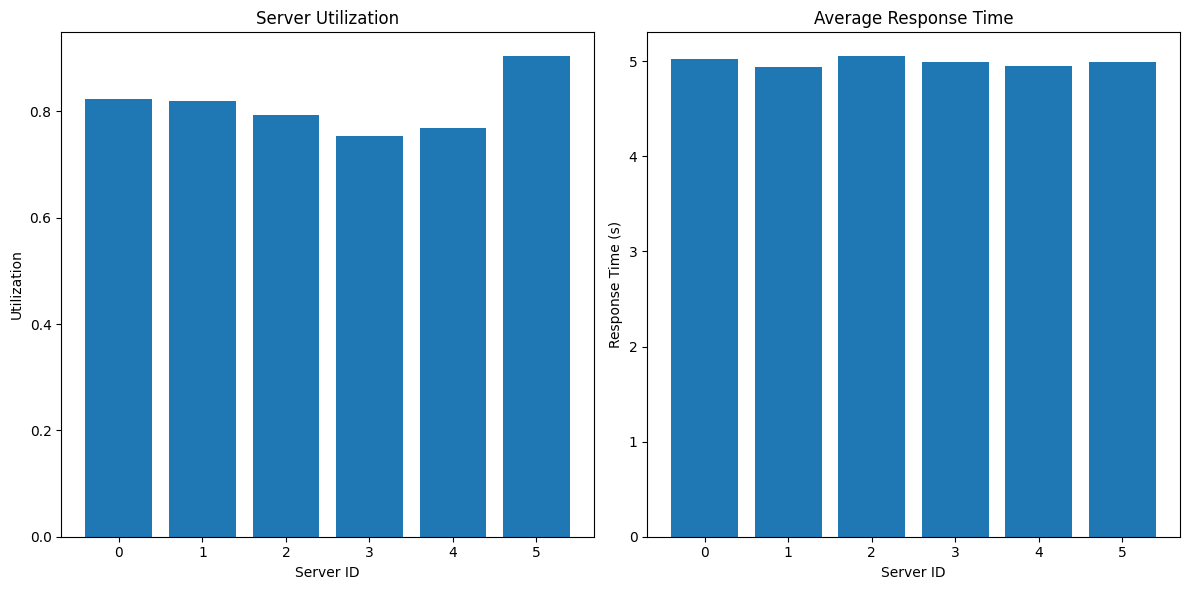

In [16]:

def run_simulation(algorithm, num_servers=4, arrival_rate=1, runtime=1000):
    # Create environment and servers
    env = simpy.Environment()
    servers = [{'id': i, 'load': 0, 'processing_times': []} for i in range(num_servers)]
    
    # Logs for analysis
    request_times = []
    processing_times = []

    # Start the request arrival process
    env.process(request_arrival(env, servers, algorithm, request_times, processing_times))
    
    # Run the simulation
    env.run(until=runtime)

    # Collect statistics
    server_utilizations = [sum(server['processing_times']) / runtime for server in servers]
    avg_response_times = [np.mean(server['processing_times']) for server in servers]
    total_requests = len(request_times)

    return server_utilizations, avg_response_times, total_requests, request_times, processing_times

# Visualization function
def visualize_results(server_utilizations, avg_response_times, request_times, processing_times):
    # Plot server utilization
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.bar(range(len(server_utilizations)), server_utilizations)
    plt.title('Server Utilization')
    plt.xlabel('Server ID')
    plt.ylabel('Utilization')

    # Plot average response time
    plt.subplot(1, 2, 2)
    plt.bar(range(len(avg_response_times)), avg_response_times)
    plt.title('Average Response Time')
    plt.xlabel('Server ID')
    plt.ylabel('Response Time (s)')
    
    plt.tight_layout()
    plt.show()

# Main experiment loop
def experiment():
    algorithms = [round_robin, least_loaded, random_selection]
    arrival_rates = [0.5, 1, 2]  # Different traffic intensities
    server_counts = [2, 4, 6]  # Different numbers of servers

    for algorithm in algorithms:
        for arrival_rate in arrival_rates:
            for server_count in server_counts:
                print(f"Running simulation with {algorithm.__name__}, Arrival Rate: {arrival_rate}, Servers: {server_count}")
                server_utilizations, avg_response_times, total_requests, request_times, processing_times = run_simulation(algorithm, num_servers=server_count, arrival_rate=arrival_rate)

                # Display results
                print(f"Total Requests: {total_requests}")
                print(f"Server Utilizations: {server_utilizations}")
                print(f"Average Response Times: {avg_response_times}")
                print("-" * 50)

                # Visualize the results
                visualize_results(server_utilizations, avg_response_times, request_times, processing_times)

# Run the experiment
if __name__ == '__main__':
    experiment()
